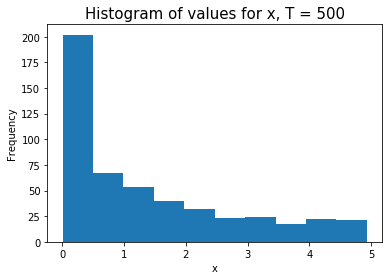

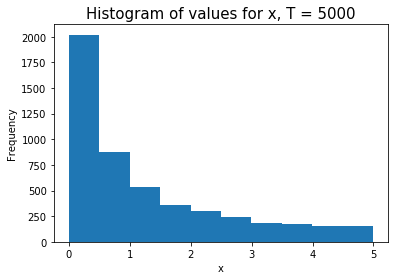

1.3661293352550137
1.261707186586468
1.2721959107830747


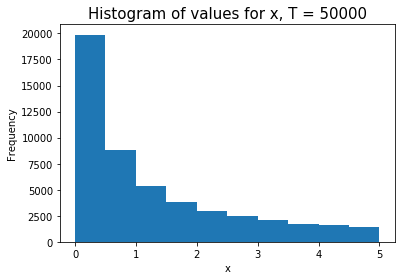

In [2]:
import random,math
import numpy as np
import scipy
from scipy import stats
from numpy import vstack
from numpy import concatenate
from pynverse import inversefunc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams
%matplotlib inline








#(1) Description of algorithm:
#           Our algorithm is based on two sampling techniques: the inverse probability transform sampling and the Gibbs sampling.
#    First, we want to get a way to sample points from a truncated exponential distribution. To do this, we apply the inverse probability
#    transform by picking points from the uniform distribution and then compose it with the inverse cdf of the truncated exponential distribution.
#    Let F denote the cdf of our desired distribution and U be the uniform distribution. Then F^-1(U)~F will have the same probability distribution as F.
#    This is due to the fact that for any z, P(F^-1(U)<= z) = P(U <= F(z)) = F(z).
#    This step is realized by the function inverse_transform(B,y), which samples n points from an truncated exponential distribution with parameter
#    y and whose range lies in [0,B].


def conditional_dist(x, y): #computes the conditional distribution of x given y.
    p = y * exp(-y * x)  #this is the conditional distribution of X given Y=y.
    return p

def cdf(x, y, B): #computes the cdf for conditional distribution function.
    integeral_val = scipy.integrate.quad(conditional_dist, 0, B) #The integral of the conditional distribution from 0 to B.
    const = 1/integeral_val  #normalizing constant.
    cdf = const * conditional_dist  #to scale the conditional distribution so that it integrates to 1.
    return cdf

def inverse_transform(B, y): #implements the inverse probability transform.
    cdf = np.random.uniform(0, 1)  #randomly pick a number in [0,1].
    x = - math.log(1 - cdf * (1 - math.exp(-B * y)))/y  #apply the inverse of the cdf of the conditional distribution to it.
    return x


#    Second, we apply the Gibbs sampling to get an estimation of the joint distribution of X and Y. By assumption, the conditional
#    distribution of x given y is the exponential distribution with parameter y and the conditional distribution of y given x is 
#    the exponential distribution with parameter x. Now, we first take one random number from 0 to B as the start value of y. Then
#    given the value of y, we can sample a point from the conditional distribution of X given Y = y, which is the truncated exponential distribution 
#    to get a value of x. Then, given the value of x, we can again sample a point from the conditional distribution of Y given X = x,
#    which is again an truncated exponential distribution to get a new value for y. We repeat the step above for T times to get T+1 samples of
#    x and y. By the property of Gibbs sampling, we know that our sample will converges to the true joint distribution of X and Y.
#    The above is implemented by the function gibbs(B,T), where [0,B] is the support for X and Y, and T is the number of iterations.


def gibbs(B,T): #B is the upper bound for X and Y, and T is the number of iterations.
    start_y = np.random.rand(1)*B  #Take a starting value of Y randomly from [0,B].
    start_x = inverse_transform(B, start_y)   #Draw a starting value of X from the conditional distribution of X given Y=start_y.
    start = concatenate((start_x, start_y), axis = None) #Put the starting values of X and Y together.
    result = np.matrix(start)  #Create a matrix to save the value.
    current_x = start_x[0]  #Set the current value to be the starting value.
    current_y = start_y[0]  #Set the current value to be the starting value.
    for i in range(T):  #run for T iterations.
        current_y = inverse_transform(B, current_x)  #Update the value of Y by draw a point from the conditional distribution based on the current value of X.
        current_x = inverse_transform(B, current_y)  #Update the value of X by draw a point from the conditional distribution based on the current value of Y.
        current = concatenate((current_x, current_y), axis = None)  #Put the current values of X and Y together.
        result = vstack((result, current))  #Save the current value to our matrix of samples.
    return result

#(2)Plot the sample

sample1 = gibbs(B = 5, T = 500)  #Do Gibbs sampling to get 500 samples

plt.hist(sample1[:,0])
plt.title('Histogram of values for x, T = 500', fontsize = 15)
plt.xlabel('x')
plt.ylabel("Frequency")
plt.show()


sample2 = gibbs(B = 5, T = 5000)  #Do Gibbs sampling to get 5000 samples

plt.hist(sample2[:,0])
plt.title('Histogram of values for x, T = 5000', fontsize = 15)
plt.xlabel('x')
plt.ylabel("Frequency")
plt.show()

sample3 = gibbs(B = 5, T = 50000)  #Do Gibbs sampling to get 50000 samples

plt.hist(sample3[:,0])
plt.title('Histogram of values for x, T = 50000', fontsize = 15)
plt.xlabel('x')
plt.ylabel("Frequency")

#(3)Estimation of the mean of X

est1_x = np.mean(np.asarray(sample1[:,0]))
print(est1_x)  #estimate of the mean of X using 500 samples

est2_x = np.mean(np.asarray(sample2[:,0]))
print(est2_x)  #estimate of the mean of X using 5000 samples

est3_x = np.mean(np.asarray(sample3[:,0]))
print(est3_x)  #estimate of the mean of X using 50000 samples
